In [230]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

## Singular Value Decomposition - SVD

SVD finds basis vectors of your 2-D data matrix. These basis vectors must be orthonormal (a decomposition of the original matrix), so when we multiply these basis vectors we get back our original data matrix. To find these orthonormal vectors, you use eigendecomposition. You can think of this as transforming your data matrix into a new space.

In [231]:
a = np.random.rand(5,5) #generate random square matrix
print(a.shape)
print(a)

(5, 5)
[[0.20810875 0.07640394 0.37231522 0.53356468 0.46718779]
 [0.55000497 0.45194643 0.09928196 0.12411989 0.582245  ]
 [0.56622247 0.38557597 0.16256846 0.57206004 0.74254497]
 [0.42268269 0.20548223 0.68278999 0.51846836 0.76885138]
 [0.58065585 0.06491453 0.60716791 0.32584965 0.61034687]]


In [232]:
u, s, v = np.linalg.svd(a) # u = eigenvectors, s = eigenvalues, v = eigenvectors.dot(eigenvalues)

In [233]:
lamb = np.identity(5)   # eigenvalues (lambda) must be diagonal matrix, so we need tranform original s 
new_lamb = s*lamb
print(new_lamb)

[[2.26303601 0.         0.         0.         0.        ]
 [0.         0.61772403 0.         0.         0.        ]
 [0.         0.         0.3783934  0.         0.        ]
 [0.         0.         0.         0.16018865 0.        ]
 [0.         0.         0.         0.         0.00922018]]


In [234]:
print(u.shape)
print(new_lamb.shape)
print(v.shape)

(5, 5)
(5, 5)
(5, 5)


In [235]:
recovered_a = u.dot(new_lamb.dot(v))   # to recover original square matrix, you just do dot product of your svd
print(recovered_a)                  ## if original matrix is not square, you need to transform lambda to m x n diagonal matrix

[[0.20810875 0.07640394 0.37231522 0.53356468 0.46718779]
 [0.55000497 0.45194643 0.09928196 0.12411989 0.582245  ]
 [0.56622247 0.38557597 0.16256846 0.57206004 0.74254497]
 [0.42268269 0.20548223 0.68278999 0.51846836 0.76885138]
 [0.58065585 0.06491453 0.60716791 0.32584965 0.61034687]]


## Principal Component Analysis - PCA 
Eigendecomposition is an intermediate step of PCA. Instead of taking all the eigenvectors like in SVD, we choose the top N eigenvectors that explain the most variance. Result is a reduced dimension of your original dataset with only the most important features. To determine N, we look at eigenvalues as they explain variance.

In [236]:
iris_data = load_iris()     # load iris dataset
print(iris_data.keys())
data = iris_data.data
data.shape

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


(150, 4)

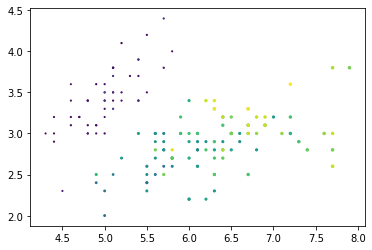

In [248]:
plt.scatter(data[:,0], data[:,1], data[:,2],data[:,3])  # scatter plot of all 4 dimensions
plt.show()

In [238]:
x = iris_data.data                    # this is a classification dataset, so we need to include target variables
y = iris_data.target

In [239]:
pca = PCA(n_components=2)            # reduce dimensionality to 2 from original 4
pca_iris = pca.fit_transform(x,y)
print(pca_iris.shape)
print(sum(pca.explained_variance_ratio_))    # with only 2 dimensions we are able to explain 98% of original dataset

(150, 2)
0.977685206318795


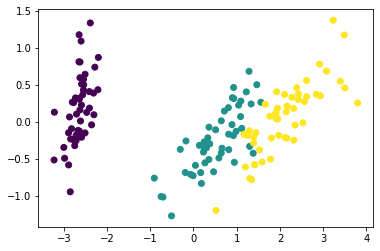

In [247]:
plt.scatter(pca_iris[:,0], pca_iris[:,1], c=y ) # reduced dimension (new space) data set of iris data and target
plt.show()

### PCA - Image Compression

(924, 905, 3)


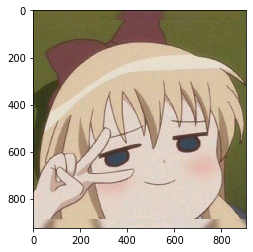

In [241]:
pic = mpimg.imread('Annotation 2020-02-27 092447.jpg')    # load and view image
plt.imshow(pic)
print(pic.shape)

In [242]:
pic_reshape = np.reshape(pic, (924, 2715))       
print(pic_reshape.shape)  # pca only reads 2 values, we can flatten/reshape our rgb then undo it late on

(924, 2715)


In [243]:
pca = PCA(n_components = 50)    
pic_pca = pca.fit_transform(pic_reshape)
print(pic_pca.shape)
print(sum(pca.explained_variance_ratio_))  # using 50 components can preserve 99% of original data

(924, 50)
0.9865944201835761


In [244]:
pca_inv = pca.inverse_transform(pic_pca) # inverse pca to get back image in compressed form
print(pca_inv.shape)
pca_inv = np.reshape(pca_inv, (924,905,3))
print(pca_inv.shape)

(924, 2715)
(924, 905, 3)


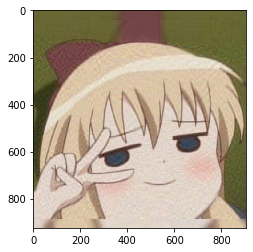

In [246]:
plt.imshow(pca_inv.astype('uint8'))  # compressed version of image
plt.show()